### Machine Learnign from Scratch is an attempt to explain the concepts of statistical algorithms via code
#### This is only possible because of the brilliant statisitical video series on YouTube by Bradon's simple linear regression series 
##### https://www.youtube.com/watch?v=ZkjP5RJLQF4&list=PLIeGtxpvyG-LoKUpV0fSY8BGKIMIdmfCi

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib

%matplotlib inline

Let's assume, you went back and collected the actual bill amount.

In [8]:
tips = pd.DataFrame({'Bill': [250, 150, 500, 890, 1300, 300, 900, 700, 1000, 650], 
                     'Tips': [20, 10, 50, 60, 90, 20, 30, 15, 75, 35]})
tips.index += 1
tips.index.name = 'Meals'
tips

,Bill,Tips
Meals,,
1,250,20
2,150,10
3,500,50
4,890,60
5,1300,90
6,300,20
7,900,30
8,700,15
9,1000,75


##### Now, the question becomes to what degree the tip amount can be predicted by the bill amount. So, the Tip is the DEPENDENT variable & the Bill is the INDEPENDENT variable.

So when we do regression, we compare the first model with this new model. So what is the least square method ?

\begin{align}
min \sum (y_{i} - \hat y_{i})^2\\
\end{align}

y = observed value of dependent variable (tip amount)

yhat = estimated(predicted) value of dependent variable (predicted tip amount)

So now we have 2 values on the graph for each x, one the actual value & the other the model predicted

#### The goal is to minimize the sum of squared differences between the observed values for the dependent variable and the estimated/predicted value of the dependent variable that is provided by the regression line. Sum of squared residuals.


Not only that but the sum of the squared residuals should be much smaller than when we just used the dependent variable alone, b=0, yhat = 40.5 for all values of x. That sum of squared residuals was 6672.5

Let's begin by plotting our data

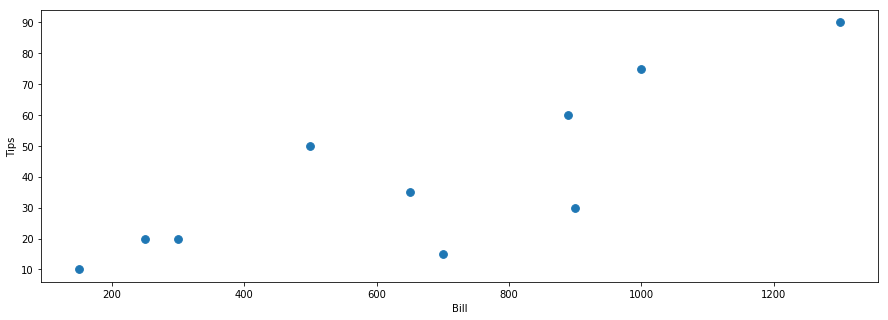

In [16]:
tips.plot.scatter(x='Bill', y='Tips', s=60, figsize=(15,5))

Look for a visual line

#### Yes, they are. If they are not then there is no linear pattern in a blob of data point. It has no use to find a linear relation there.

In [18]:
x_mean = tips['Bill'].mean()
y_mean = tips['Tips'].mean()

centroid = (x_mean, y_mean)
centroid

(664.0, 40.5)

Text(634,45.5,'CENTROID')

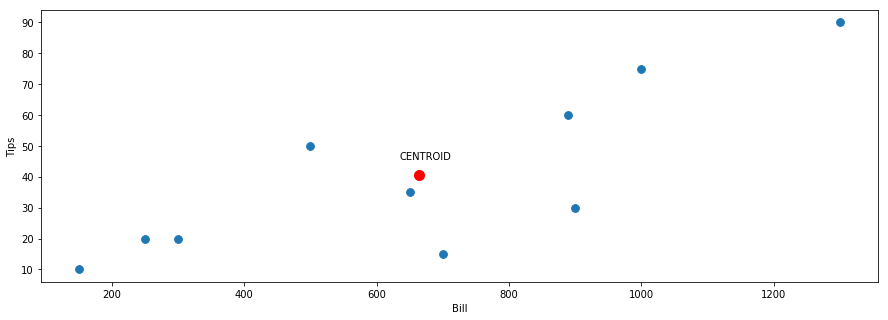

In [29]:
plot = tips.plot.scatter(x='Bill', y='Tips', s=60, figsize=(15,5))
plot.scatter(x=[x_mean], y=[y_mean], s=100, c='red')
plot.annotate('CENTROID', xy= (x_mean, y_mean), xytext=(x_mean - 30, y_mean + 5)) 

#### The best fit regression line will/must pass through the centroid.

\begin{align}
\hat y_{i} = b_{0} + b_{1}x_{1} 
\end{align}

\begin{align}
b_{1} = \frac {\sum (x_{i}- \bar x) (y_{i} - \bar y)}{\sum (x_{i}- \bar x)^2} 
\end{align}

\begin{align}
b_{0} = \bar y - b_{1} \bar x
\end{align}

In [38]:
tips['BillDeviation (xi-xbar)'] = tips['Bill'] - x_mean
tips['TipDeviation (yi-ybar)'] = tips['Tips'] - y_mean
tips['DeviationsProduct'] = tips['BillDeviation (xi-xbar)'] * tips['TipDeviation (yi-ybar)']
tips['BillDeviationsSquared'] = tips['BillDeviation (xi-xbar)'] * tips['BillDeviation (xi-xbar)']

In [39]:
tips

,Bill,Tips,BillDeviation(xi-xbar),TipDeviation (yi-ybar),BillDeviation (xi-xbar),DeviationsProduct,BillDeviationsSquared
Meals,,,,,,,
1,250,20,-414.0,-20.5,-414.0,8487.0,171396.0
2,150,10,-514.0,-30.5,-514.0,15677.0,264196.0
3,500,50,-164.0,9.5,-164.0,-1558.0,26896.0
4,890,60,226.0,19.5,226.0,4407.0,51076.0
5,1300,90,636.0,49.5,636.0,31482.0,404496.0
6,300,20,-364.0,-20.5,-364.0,7462.0,132496.0
7,900,30,236.0,-10.5,236.0,-2478.0,55696.0
8,700,15,36.0,-25.5,36.0,-918.0,1296.0
9,1000,75,336.0,34.5,336.0,11592.0,112896.0


In [40]:
# Let's calculate the slope of the regression line 

b1 = tips['DeviationsProduct'].sum() / tips['BillDeviationsSquared'].sum()
b1

0.06081236072879801

In [45]:
# Now the y intercept, 
b0 = y_mean - (b1 * x_mean)
b0

0.12059247607812296

#### Regression line 

\begin{align}
\hat y = 0.0608 x_{i} + 0.1205 
\end{align}

In [48]:
tips['PredictedTip'] = b0 + (b1 * tips['Bill'])
tips

,Bill,Tips,BillDeviation(xi-xbar),TipDeviation (yi-ybar),BillDeviation (xi-xbar),DeviationsProduct,BillDeviationsSquared,PredictedTip
Meals,,,,,,,,
1,250,20,-414.0,-20.5,-414.0,8487.0,171396.0,15.323683
2,150,10,-514.0,-30.5,-514.0,15677.0,264196.0,9.242447
3,500,50,-164.0,9.5,-164.0,-1558.0,26896.0,30.526773
4,890,60,226.0,19.5,226.0,4407.0,51076.0,54.243594
5,1300,90,636.0,49.5,636.0,31482.0,404496.0,79.176661
6,300,20,-364.0,-20.5,-364.0,7462.0,132496.0,18.364301
7,900,30,236.0,-10.5,236.0,-2478.0,55696.0,54.851717
8,700,15,36.0,-25.5,36.0,-918.0,1296.0,42.689245
9,1000,75,336.0,34.5,336.0,11592.0,112896.0,60.932953


In [50]:
tips['Error'] = tips['Tips'] - tips['PredictedTip']
tips['SquaredError'] = tips['Error'] * tips['Error']
tips

,Bill,Tips,BillDeviation(xi-xbar),TipDeviation (yi-ybar),BillDeviation (xi-xbar),DeviationsProduct,BillDeviationsSquared,PredictedTip,Error,SquaredError
Meals,,,,,,,,,,
1,250,20,-414.0,-20.5,-414.0,8487.0,171396.0,15.323683,4.676317,21.867944
2,150,10,-514.0,-30.5,-514.0,15677.0,264196.0,9.242447,0.757553,0.573887
3,500,50,-164.0,9.5,-164.0,-1558.0,26896.0,30.526773,19.473227,379.206576
4,890,60,226.0,19.5,226.0,4407.0,51076.0,54.243594,5.756406,33.136216
5,1300,90,636.0,49.5,636.0,31482.0,404496.0,79.176661,10.823339,117.144658
6,300,20,-364.0,-20.5,-364.0,7462.0,132496.0,18.364301,1.635699,2.675512
7,900,30,236.0,-10.5,236.0,-2478.0,55696.0,54.851717,-24.851717,617.607844
8,700,15,36.0,-25.5,36.0,-918.0,1296.0,42.689245,-27.689245,766.694288
9,1000,75,336.0,34.5,336.0,11592.0,112896.0,60.932953,14.067047,197.881806


In [51]:
sse = tips['SquaredError'].sum()
sse

2158.398463101324

Text(634,45.5,'CENTROID')

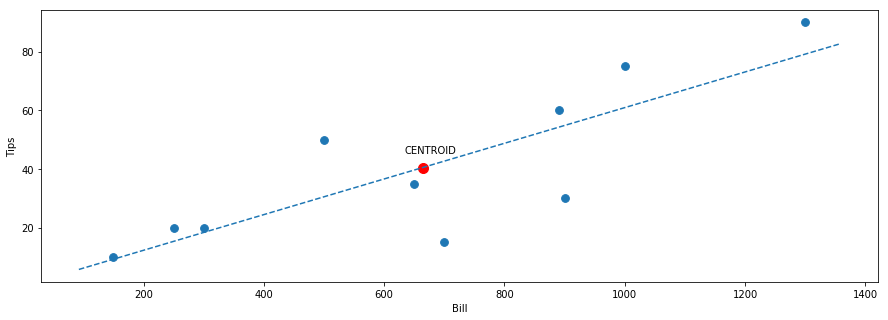

In [55]:

#A lot of these solutions are focusing on adding a line to the plot that fits the data. Here's a simple solution for adding an arbitrary line to the plot based on a slope and intercept.

import numpy as np
plot = tips.plot.scatter(x='Bill', y='Tips', s=60, figsize=(15,5))
plot.scatter(x=[x_mean], y=[y_mean], s=100, c='red')

# axes = plot.gca()
x_vals = np.array(plot.get_xlim())
y_vals = b0 + b1 * x_vals
plot.plot(x_vals, y_vals, '--')

plot.annotate('CENTROID', xy= (x_mean, y_mean), xytext=(x_mean - 30, y_mean + 5))

# def abline(slope, intercept):
#     """Plot a line from slope and intercept"""
#     axes = plt.gca()
#     x_vals = np.array(axes.get_xlim())
#     y_vals = intercept + slope * x_vals
#     plt.plot(x_vals, y_vals, '--')

best linear unbiased estimator BLUE
basic econometrics damodar n gujrati
